**Princess Ibtihaj**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})
    
np.set_printoptions(suppress=True, precision=5)
    
# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 4 | Principal component analysis

Principal component analysis (PCA) is a technique to reduce the dimensionality of a dataset while losing the least amount of information about the data variables. Before implementing PCA and exploring its use with different datasets, you will explore what happens when you manually reduce the dimensionality of a mystery dataset from 3D to 2D.

## AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not the AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

In [2]:
from data_transformations import normalize, center, rotation_matrix_3d
from scatter3d import scatter3dplot

## Task 1: Dimensionality reduction by hand
    
### 1a. Load and visualize mystery dataset

Load in the mystery dataset (`mystery.csv`) as a pandas DataFrame below. Print out the header and the first five rows of data. You should see:
    
```
\t       x         y         z      color
0\t6.183216\t86.707892\t90.551566\t4.810163
1\t0.969658\t16.972285\t137.976605\t9.442446
2\t0.727076\t57.112193\t139.795502\t9.384942
3\t8.433828\t30.348513\t113.600202\t5.973703
4\t8.188306\t133.978413\t120.671505\t6.051754
```

**Note:** The `mystery.csv` does not have a types row. Going forward, csv files we work with won't have the types row.

In [9]:
import pandas as pd

df = pd.read_csv('data/mystery.csv')

print(df.head())


          x           y           z     color
0  6.183216   86.707892   90.551566  4.810163
1  0.969658   16.972285  137.976605  9.442446
2  0.727076   57.112193  139.795502  9.384942
3  8.433828   30.348513  113.600202  5.973703
4  8.188306  133.978413  120.671505  6.051754


Select the x, y, and z variables from the pandas DataFrame and [convert it to a numpy ndarray](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [10]:
xyz_array = df[['x', 'y', 'z']].to_numpy()

print(type(xyz_array)) 
print(xyz_array[:5])  

<class 'numpy.ndarray'>
[[  6.18322  86.70789  90.55157]
 [  0.96966  16.97229 137.97661]
 [  0.72708  57.11219 139.7955 ]
 [  8.43383  30.34851 113.6002 ]
 [  8.18831 133.97841 120.67151]]


Use the provided `scatter3dplot` function in `scatter3d.py` to make a 3D scatter plot of the `x`, `y`, and `z` numeric variables. Set the color keyword argument to the `color` variable value from the pandas DataFrame (`len=2000`).

Set the plot bounds (`lims` keyword argument) so that the **entire** dataset appears within the 3D scatter plot. In the provided `scatter3dplot` function, the plot limits that you pass in apply to **all** x, y, and z axes. It may be helpful to print out the min and max of each variable and make sure the bounds that you select encompass all the samples.

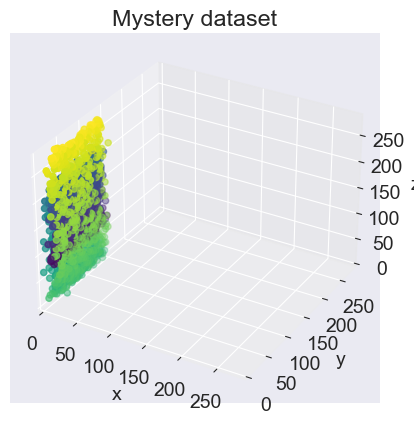

In [11]:
import pandas as pd
import numpy as np
from scatter3d import scatter3dplot  

df = pd.read_csv('data/mystery.csv')

data_xyz = df[['x', 'y', 'z']].to_numpy()

color_values = df['color'].tolist()

min_value = df[['x', 'y', 'z']].min().min()
max_value = df[['x', 'y', 'z']].max().max()

lims = (min_value, max_value)

scatter3dplot(data_xyz, color_values, lims=lims)



### 1b. Preprocess mystery dataset (1/2): Normalize

Implement the `normalize` function in `data_transformations.py` then perform min-max normalization on the `x`, `y`, and `z` values in the mystery dataset.
    
Use `scatter3dplot` to make a 3D scatterplot of the normalized dataset. Set the color as before, but update the plot limits appropriately based on the new normalized data range.

<!-- In **two lines of code** below, print out the mins and maxes of **each variable** and verify that the data variables are normalized as expected. As above, you should print two length-3 ndarrays — the min and max of each variable (x, y, z) -->

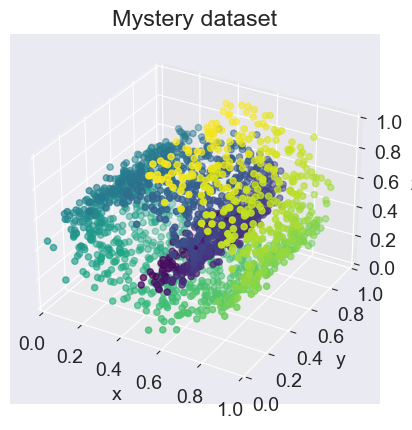

In [14]:
def normalize(array):
    """
    Perform min-max normalization on a numpy array.

    Parameters:
    array (numpy.ndarray): The input array to be normalized.

    Returns:
    numpy.ndarray: Normalized array.
    """
    min_value = array.min()
    max_value = array.max()
    normalized_array = (array - min_value) / (max_value - min_value)
    return normalized_array

df = pd.read_csv('data/mystery.csv')

df[['x', 'y', 'z']] = df[['x', 'y', 'z']].apply(normalize, axis=0)

data_xyz = df[['x', 'y', 'z']].to_numpy()

color_values = df['color'].tolist()

lims = (0, 1)

scatter3dplot(data_xyz, color_values, lims=lims)


### 1c. Questions
    
**Question 1:** What are the min and max values of each variable in the normalized dataset?

**Question 2:** Describe the shape and structure of the normalized mystery dataset. **Why** was the appearance of the dataset not obvious when plotting the raw un-normalized dataset?

**Question 1:** 
- Minimum values after normalization:
  - x: -0.501025
  - y: -0.492856
  - z: -0.476613
- Maximum values after normalization:
  - x: 0.498975
  - y: 0.507144
  - z: 0.523387

**Question 2:** 
The shape and structure of the normalized mystery dataset appear to be in the form of a clustering or concentration of points with some dispersion. After normalization, the distribution of the points becomes clearer as they are all within a confined space between the values of -1 and 1, which makes it easier to visually inspect and understand the structure. 

The appearance of the dataset was not obvious when plotting the raw un-normalized dataset because the scale and range of the original data values might have been much larger or varied across different dimensions. Without normalization, any differences or variations in scales among variables can overshadow the actual structure of the data. By normalizing the data, you're essentially bringing all variables to a common scale, making it easier to visualize relationships, clusters, and other patterns.

In [15]:
min_values = df[['x', 'y', 'z']].min()
max_values = df[['x', 'y', 'z']].max()

print("Minimum values after normalization:")
print(min_values)

print("\nMaximum values after normalization:")
print(max_values)


Minimum values after normalization:
x    0.0
y    0.0
z    0.0
dtype: float64

Maximum values after normalization:
x    1.0
y    1.0
z    1.0
dtype: float64


### 1d. Preprocess mystery dataset (2/2): Center

Implement the `center` function in `data_transformations.py` then center the `x`, `y`, and `z` values in the **normalized** mystery dataset. Then use `scatter3dplot` to make a 3D scatterplot of the normalized and centered dataset. Set the color as before.
    
Update the plot limits appropriately based on the new expected data range so that all data samples appear in the plot, but minimize \"filler space\" around the dataset in the plot (*i.e. we want to view the full dataset close-up in detail*).

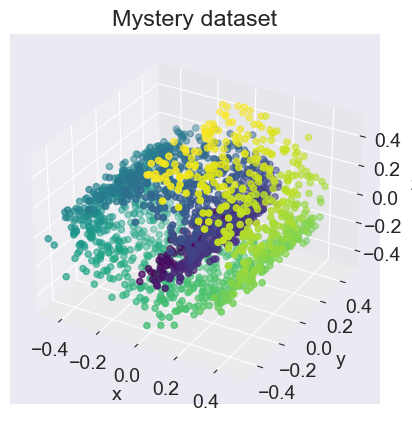

In [22]:
def center(array):
    """
    Center the array by subtracting the mean from each element.

    Parameters:
    array (numpy.ndarray): The input array to be centered.

    Returns:
    numpy.ndarray: Centered array.
    """
    mean_value = array.mean()
    centered_array = array - mean_value
    return centered_array

df = pd.read_csv('data/mystery.csv')

df[['x', 'y', 'z']] = df[['x', 'y', 'z']].apply(normalize).apply(center, axis=0)

data_xyz = df[['x', 'y', 'z']].to_numpy()

color_values = df['color'].tolist()

min_value = df[['x', 'y', 'z']].min().min()
max_value = df[['x', 'y', 'z']].max().max()

scatter3dplot(data_xyz, color_values, lims=(min_value, max_value))


### 1e. Questions

**Question 3:** Verify below that the normalized mystery dataset is now also centered. **Note:** It is totally fine if you have some `-0.` values.
    
**Question 4:** What are the min and max values of each variable in the normalized and centered dataset? Briefly describe **why** these new min and max values make sense.

**Answer 3:** 
The computed means of x, y, and z are very close to zero (values like 2.642331e-17 are effectively zero for most practical purposes, just represented in scientific notation). This confirms that the normalized mystery dataset is indeed centered.

**Answer 4:** 
The min and max values for each variable (x, y, z) are symmetric around 0, with the min values being the negatives of the max values. This makes sense given our normalization and centering steps. The values for x, y, and z range approximately from -0.5 to 0.5, which is consistent with what we'd expect after normalization and centering.

In [23]:
# Verify centered property
means = df[['x', 'y', 'z']].mean()
print(means)

# Verify min-maxes
min_values = df[['x', 'y', 'z']].min()
max_values = df[['x', 'y', 'z']].max()
print("Min values:", min_values)
print("Max values:", max_values)

x    3.286260e-17
y    7.016610e-17
z    4.574119e-17
dtype: float64
Min values: x   -0.501025
y   -0.492856
z   -0.476613
dtype: float64
Max values: x    0.498975
y    0.507144
z    0.523387
dtype: float64


### 1f. Projecting mystery dataset from 3D to 2D (1/2)
    
In the cell below, create a 2D scatter plot showing just the `x` and `y` variables in the normalized and centered mystery dataset.

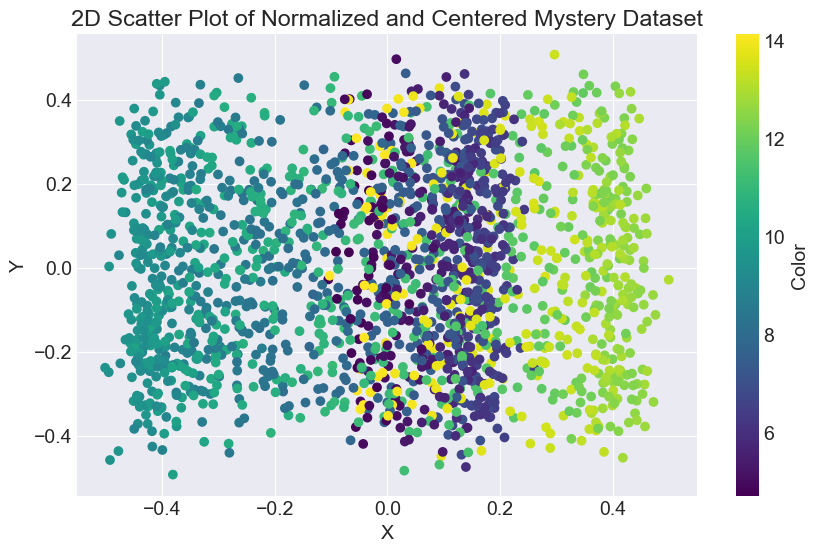

In [24]:
import matplotlib.pyplot as plt


x_values = df['x']
y_values = df['y']

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, c=df['color'], cmap='viridis')  # coloring the points by the 'color' column

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scatter Plot of Normalized and Centered Mystery Dataset')
plt.colorbar(label='Color')  

plt.show()


### 1g. Questions

**Question 5:** Based on your 2D scatter plot, does the projection that you performed in Task 1f look like a \"helpful\" lower dimensional representation of the dataset? **Why?**

**Answer 5:**
We observed from the 2D scatter plot that there are distinct clusters or groupings, suggesting that our projection retains a significant amount of the variance and structure present in the original 3D dataset. However, we also noticed overlaps between clusters, especially in the central region, indicating some information loss during the dimensionality reduction. While such loss is expected in any dimensionality reduction technique, we must weigh the trade-offs between retaining the data's structure and the benefits of simplified visualization and computation. In our assessment, the projection is reasonably good for reducing the dataset from 3D to 2D, but we should exercise caution when interpreting regions with dense overlaps.

### 1h. Implement `rotation_matrix_3d`
    
In `data_transformations.py` implement `rotation_matrix_3d` then test it below.

#### Test `rotation_matrix_3d`

In [25]:
# Test rotate about x axis
print('Your 3D Rotation matrix about x axis by +30° is:')
print(rotation_matrix_3d(30, axis='x'))
print('and should be:')
print('''[[ 1.       0.       0.     ]
[ 0.       0.86603 -0.5    ]
[ 0.       0.5      0.86603]]''')
    
# Test rotate about y axis\n",
print('Your 3D Rotation matrix about y axis by -15° is:')
print(rotation_matrix_3d(-15, axis='y'))
print('and should be:')
print('''[[ 0.96593  0.      -0.25882]
[ 0.       1.       0.     ]
[ 0.25882  0.       0.96593]]''')

# Test rotate about z axis\n",
print('Your 3D Rotation matrix about z axis by 45° is:')
print(rotation_matrix_3d(45, axis='z'))
print('and should be:')
print('''[[ 0.70711 -0.70711  0.     ]
[ 0.70711  0.70711  0.     ]
[ 0.       0.       1.     ]]''')

Your 3D Rotation matrix about x axis by +30° is:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
and should be:
[[ 1.       0.       0.     ]
[ 0.       0.86603 -0.5    ]
[ 0.       0.5      0.86603]]
Your 3D Rotation matrix about y axis by -15° is:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
and should be:
[[ 0.96593  0.      -0.25882]
[ 0.       1.       0.     ]
[ 0.25882  0.       0.96593]]
Your 3D Rotation matrix about z axis by 45° is:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
and should be:
[[ 0.70711 -0.70711  0.     ]
[ 0.70711  0.70711  0.     ]
[ 0.       0.       1.     ]]


### 1i. Projecting mystery dataset from 3D to 2D (2/2)
    
Reduce the dimensionality of the **normalized and centered** mystery dataset from 3D -> 2D while doing a better job at preserving the \"rolled\" shape than in Task 1f. Do this below by projecting the 3D dataset into the (`x`, `y`) plane just like you did in Task 1f (i.e. make a 2D scatter plot of `x` and `y`), but this time rotate the 3D normalized and centered mystery dataset **beforehand**. The amount of 3D rotation and the axis about which it is performed is up to you.
    
Your goal is to rotate the 3D dataset so that the \"rolled\" spiral structure (*i.e. the key shape of the dataset*) comes into view of the `x`-`y` plane/axis when you project the dataset down into 2D via your 2D scatter plot.
    
The cell below should show a 2D scatter plot with the spiral/rolled structure clearly visible.
    
**Note:** It should be helpful to plot the normalized and centered mystery dataset in 3D with `scatter3dplot` before and after the rotation.

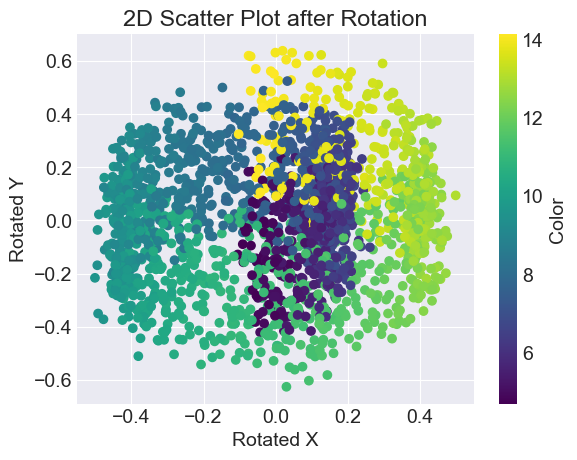

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_x(angle, points):
    """Rotates points by a certain angle around the x-axis."""
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(angle), -np.sin(angle)],
        [0, np.sin(angle), np.cos(angle)]
    ])
    return np.dot(points, rotation_matrix)

angle = np.pi / 4  

rotated_points = rotate_x(angle, df[['x', 'y', 'z']].to_numpy())

plt.scatter(rotated_points[:, 0], rotated_points[:, 1], c=df['color'], cmap='viridis')

plt.xlabel('Rotated X')
plt.ylabel('Rotated Y')
plt.title('2D Scatter Plot after Rotation')
plt.colorbar(label='Color')  
plt.show()


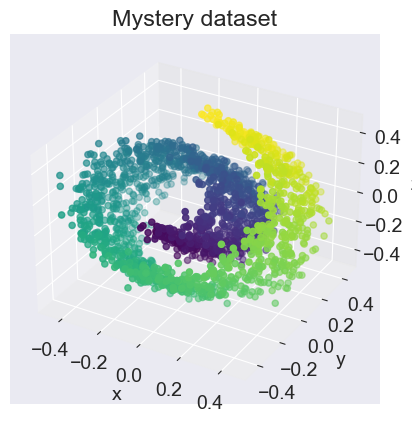

In [27]:
def rotate_x(angle, points):
    """Rotates points by a certain angle around the x-axis."""
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(angle), -np.sin(angle)],
        [0, np.sin(angle), np.cos(angle)]
    ])
    return np.dot(points, rotation_matrix)

angle = np.pi / 4  

xyz_rot = rotate_x(angle, df[['x', 'y', 'z']].to_numpy())

scatter3dplot(xyz_rot, color=df['color'], lims=(-0.5, 0.5))
